### 네이버 데이터랩에서 검색어 트렌드 분석
- 검색어 트렌드 분석을 통한 검색어 중가에 따른 추가 영향 분석
- 마케팅 효과에 따른 검색어 증가량 분석 
- 마케팅 수명관리 
- 경쟁사 마케팅 파급효과 분석 
- [코드](https://developers.naver.com/docs/datalab/search/#python)

In [1]:
#한국어 깨짐 방지

%config InlineBackend.figure_format = 'retina'


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pandas.plotting import register_matplotlib_converters

C:\Users\user\anaconda3\envs\py36\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\anaconda3\envs\py36\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\user\anaconda3\envs\py36\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (20, 10)
register_matplotlib_converters()
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

Matplotlib is building the font cache; this may take a moment.


In [4]:
import json
import os
import sys
import urllib.request
client_id = "_a06sojjtqMHlm_kBAp7"
client_secret = "b10tsuv4u0"
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2017-01-01\",\"endDate\":\"2017-04-30\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"한글\",\"keywords\":[\"한글\",\"korean\"]},{\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}],\"device\":\"pc\",\"ages\":[\"1\",\"2\"],\"gender\":\"f\"}";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)



{"startDate":"2017-01-01","endDate":"2017-04-30","timeUnit":"month","results":[{"title":"한글","keywords":["한글","korean"],"data":[{"period":"2017-01-01","ratio":47.00101},{"period":"2017-02-01","ratio":53.23619},{"period":"2017-03-01","ratio":100},{"period":"2017-04-01","ratio":85.327}]},{"title":"영어","keywords":["영어","english"],"data":[{"period":"2017-01-01","ratio":40.0881},{"period":"2017-02-01","ratio":36.69942},{"period":"2017-03-01","ratio":52.11792},{"period":"2017-04-01","ratio":44.4595}]}]}


In [6]:
import json
import os
import sys
import urllib.request

client_id = "_a06sojjtqMHlm_kBAp7"
client_secret = "b10tsuv4u0"
url = "https://openapi.naver.com/v1/datalab/search";
#body = "{\"startDate\":\"2017-01-01\",\"endDate\":\"2017-04-30\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"한글\",\"keywords\":[\"한글\",\"korean\"]},{\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}],\"device\":\"pc\",\"ages\":[\"1\",\"2\"],\"gender\":\"f\"}"
body="""{
    "startDate":"2019-01-01",
    "endDate":"2020-08-30",
    "timeUnit":"month",
    "keywordGroups":[
          {"groupName":"기생충","keywords":["기생충","봉준호","짜파구리","CJ ENM"]},
          {"groupName":"반도","keywords":["반도","CJ ENM"]}
    ]
    }"""
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    res = response_body.decode('utf-8')
    print(res)
else:
    print("Error Code:" + rescode)



{"startDate":"2019-01-01","endDate":"2020-08-31","timeUnit":"month","results":[{"title":"기생충","keywords":["기생충","봉준호","짜파구리","CJ ENM"],"data":[{"period":"2019-01-01","ratio":0.99682},{"period":"2019-02-01","ratio":1.23235},{"period":"2019-03-01","ratio":1.03002},{"period":"2019-04-01","ratio":7.92022},{"period":"2019-05-01","ratio":46.82542},{"period":"2019-06-01","ratio":59.07226},{"period":"2019-07-01","ratio":11.90921},{"period":"2019-08-01","ratio":12.20851},{"period":"2019-09-01","ratio":4.86102},{"period":"2019-10-01","ratio":3.7481},{"period":"2019-11-01","ratio":5.34911},{"period":"2019-12-01","ratio":5.05451},{"period":"2020-01-01","ratio":20.11018},{"period":"2020-02-01","ratio":100},{"period":"2020-03-01","ratio":9.47802},{"period":"2020-04-01","ratio":5.92012},{"period":"2020-05-01","ratio":4.90204},{"period":"2020-06-01","ratio":4.35607},{"period":"2020-07-01","ratio":4.52975},{"period":"2020-08-01","ratio":4.40892}]},{"title":"반도","keywords":["반도","CJ ENM"],"data":[{"peri

<AxesSubplot:>

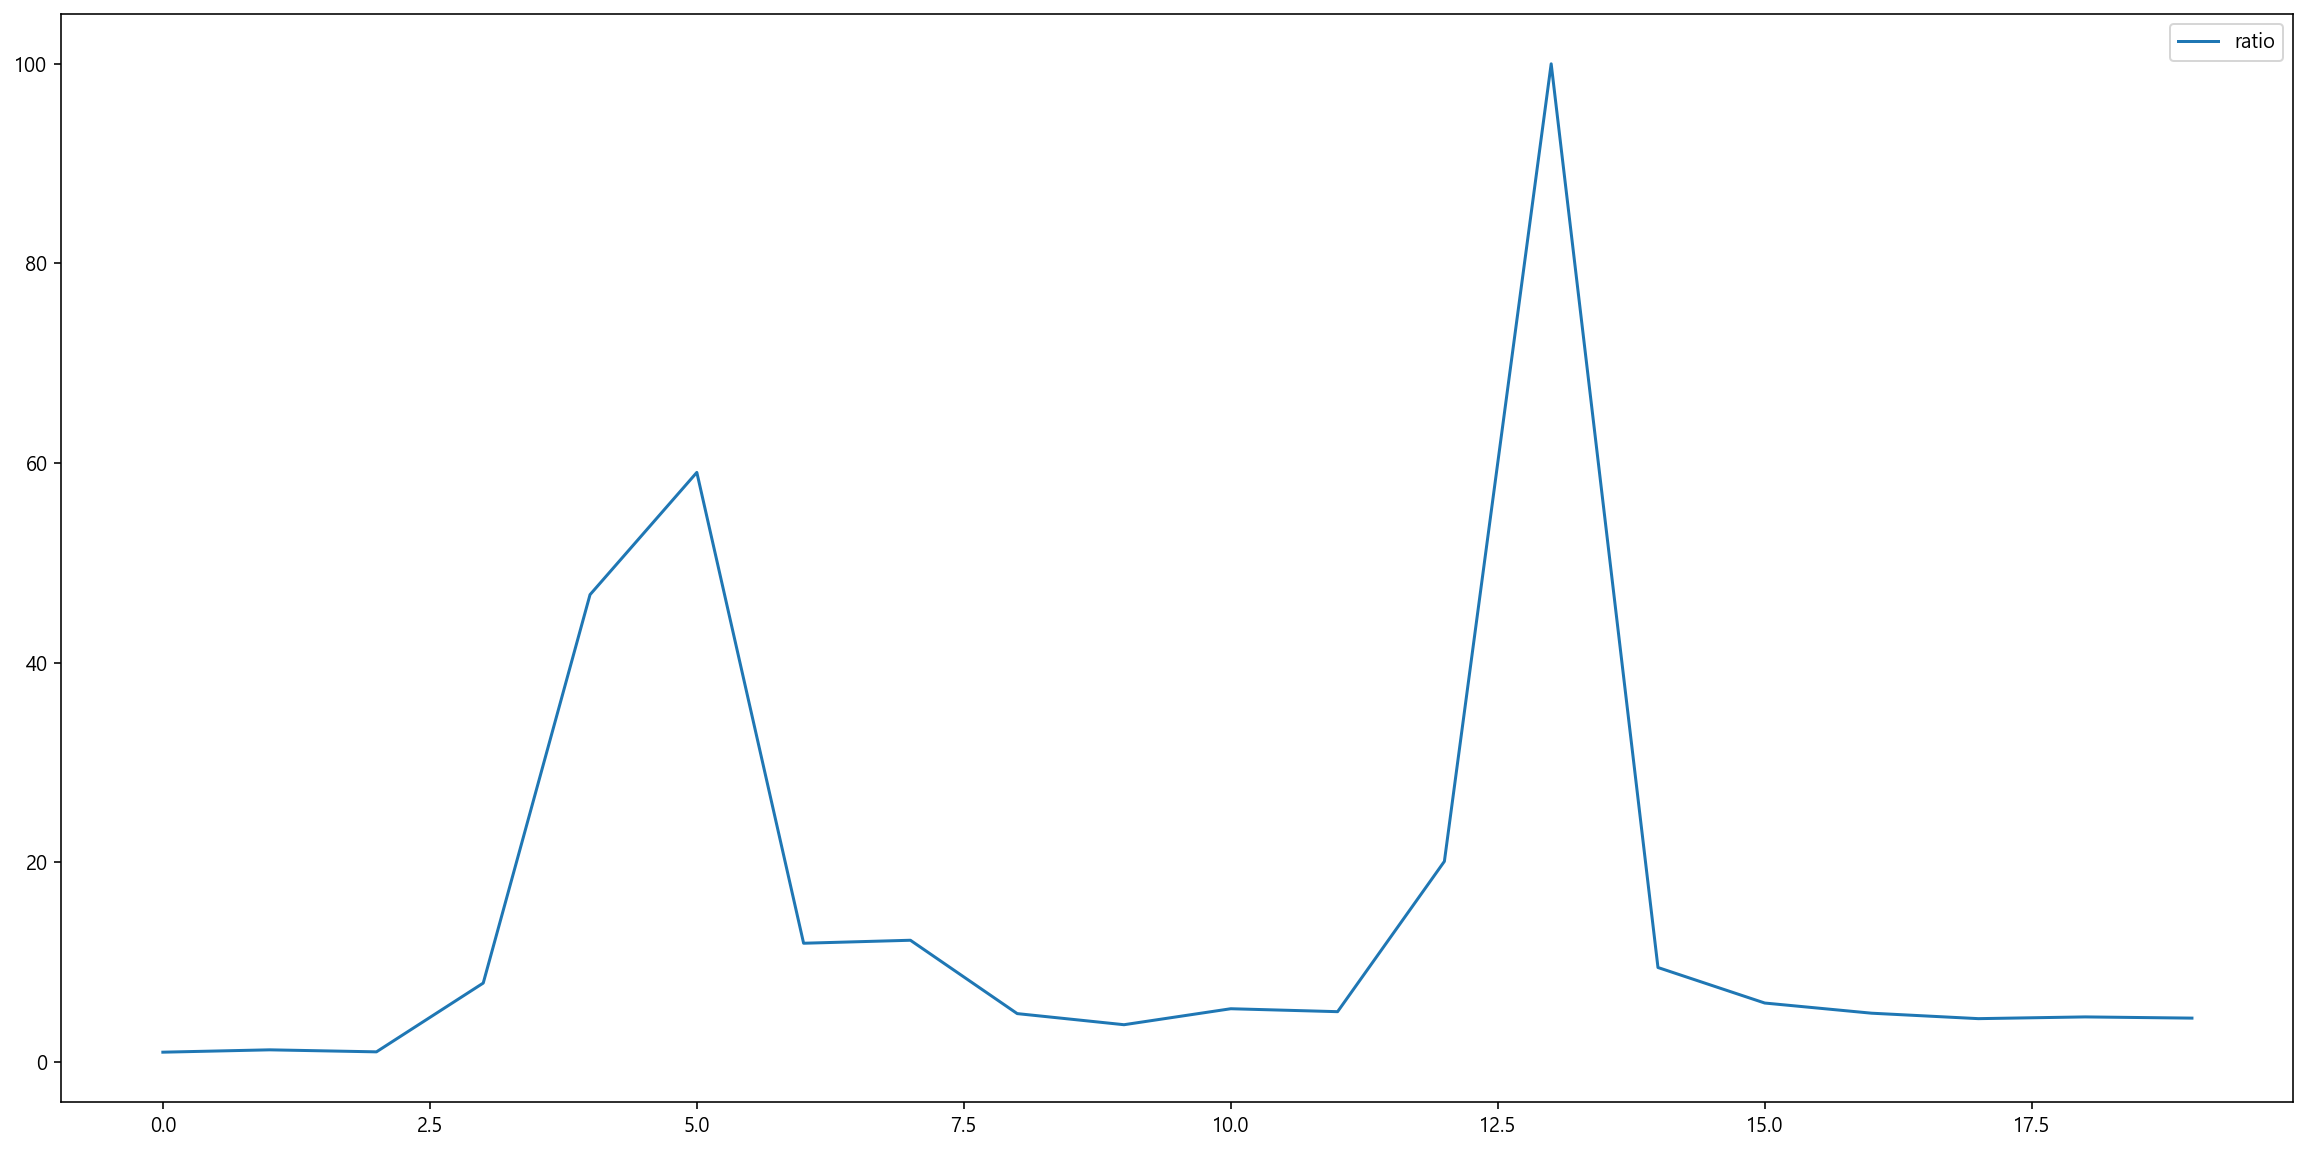

In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

jdata = json.loads(res)

pdata=jdata['results'][0]['data']
cjdf= pd.DataFrame.from_dict(pdata)
cjdf.plot()

In [8]:
keywords=[
['극한직업'],
['사바하'],
['걸캅스'],
['나쁜녀석들'],
['기생충','봉준호','짜파구리'],
]
def makeQry(keywords=[],sday='2019-01-01',eday='2020-08-30',tunit='date'):
    res=[]
    for words in keywords:
        dict={'groupName':words[0],'keywords':words}
        res.append(dict)
    rdict={"startDate":sday,
    "endDate":eday,
    "timeUnit":tunit,
    "keywordGroups":res
          }
    return json.dumps(rdict,ensure_ascii = False )


makeQry(keywords,'2019-01-01','2020-08-30','date')

'{"startDate": "2019-01-01", "endDate": "2020-08-30", "timeUnit": "date", "keywordGroups": [{"groupName": "극한직업", "keywords": ["극한직업"]}, {"groupName": "사바하", "keywords": ["사바하"]}, {"groupName": "걸캅스", "keywords": ["걸캅스"]}, {"groupName": "나쁜녀석들", "keywords": ["나쁜녀석들"]}, {"groupName": "기생충", "keywords": ["기생충", "봉준호", "짜파구리"]}]}'

In [9]:
def Mynsearch(keywords,sday='2019-01-01',eday='2020-08-30',tunit='date'):
    client_id = "_a06sojjtqMHlm_kBAp7"
    client_secret = "b10tsuv4u0"
    url = "https://openapi.naver.com/v1/datalab/search";
    
    body=makeQry(keywords,sday,eday,tunit)
    
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        res=response_body.decode('utf-8')
        print(res)
    else:
        res="error"
        print("Error Code:" + rescode)
    return res

Mynsearch(keywords,'2019-01-01','2020-08-30','date')

{"startDate":"2019-01-01","endDate":"2020-08-30","timeUnit":"date","results":[{"title":"극한직업","keywords":["극한직업"],"data":[{"period":"2019-01-01","ratio":0.09183},{"period":"2019-01-02","ratio":0.10569},{"period":"2019-01-03","ratio":0.10303},{"period":"2019-01-04","ratio":0.91302},{"period":"2019-01-05","ratio":0.2028},{"period":"2019-01-06","ratio":0.23278},{"period":"2019-01-07","ratio":0.20697},{"period":"2019-01-08","ratio":0.20453},{"period":"2019-01-09","ratio":0.31833},{"period":"2019-01-10","ratio":0.38602},{"period":"2019-01-11","ratio":0.30832},{"period":"2019-01-12","ratio":0.33613},{"period":"2019-01-13","ratio":0.31173},{"period":"2019-01-14","ratio":0.31187},{"period":"2019-01-15","ratio":0.42026},{"period":"2019-01-16","ratio":0.5335},{"period":"2019-01-17","ratio":0.45531},{"period":"2019-01-18","ratio":0.75684},{"period":"2019-01-19","ratio":1.14095},{"period":"2019-01-20","ratio":1.4726},{"period":"2019-01-21","ratio":1.39676},{"period":"2019-01-22","ratio":1.58118},{

'{"startDate":"2019-01-01","endDate":"2020-08-30","timeUnit":"date","results":[{"title":"극한직업","keywords":["극한직업"],"data":[{"period":"2019-01-01","ratio":0.09183},{"period":"2019-01-02","ratio":0.10569},{"period":"2019-01-03","ratio":0.10303},{"period":"2019-01-04","ratio":0.91302},{"period":"2019-01-05","ratio":0.2028},{"period":"2019-01-06","ratio":0.23278},{"period":"2019-01-07","ratio":0.20697},{"period":"2019-01-08","ratio":0.20453},{"period":"2019-01-09","ratio":0.31833},{"period":"2019-01-10","ratio":0.38602},{"period":"2019-01-11","ratio":0.30832},{"period":"2019-01-12","ratio":0.33613},{"period":"2019-01-13","ratio":0.31173},{"period":"2019-01-14","ratio":0.31187},{"period":"2019-01-15","ratio":0.42026},{"period":"2019-01-16","ratio":0.5335},{"period":"2019-01-17","ratio":0.45531},{"period":"2019-01-18","ratio":0.75684},{"period":"2019-01-19","ratio":1.14095},{"period":"2019-01-20","ratio":1.4726},{"period":"2019-01-21","ratio":1.39676},{"period":"2019-01-22","ratio":1.58118},

{"startDate":"2019-01-01","endDate":"2020-08-30","timeUnit":"date","results":[{"title":"우리은행","keywords":["우리은행"],"data":[{"period":"2019-01-01","ratio":5.31091},{"period":"2019-01-02","ratio":18.03789},{"period":"2019-01-03","ratio":14.88294},{"period":"2019-01-04","ratio":14.05243},{"period":"2019-01-05","ratio":4.84798},{"period":"2019-01-06","ratio":8.58353},{"period":"2019-01-07","ratio":18.14195},{"period":"2019-01-08","ratio":15.32666},{"period":"2019-01-09","ratio":14.17568},{"period":"2019-01-10","ratio":17.0893},{"period":"2019-01-11","ratio":13.69056},{"period":"2019-01-12","ratio":4.67719},{"period":"2019-01-13","ratio":5.12827},{"period":"2019-01-14","ratio":17.31906},{"period":"2019-01-15","ratio":21.36132},{"period":"2019-01-16","ratio":19.41346},{"period":"2019-01-17","ratio":18.22843},{"period":"2019-01-18","ratio":18.27501},{"period":"2019-01-19","ratio":6.8638},{"period":"2019-01-20","ratio":7.32346},{"period":"2019-01-21","ratio":24.98913},{"period":"2019-01-22","ra

C:\Users\user\anaconda3\envs\py36\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


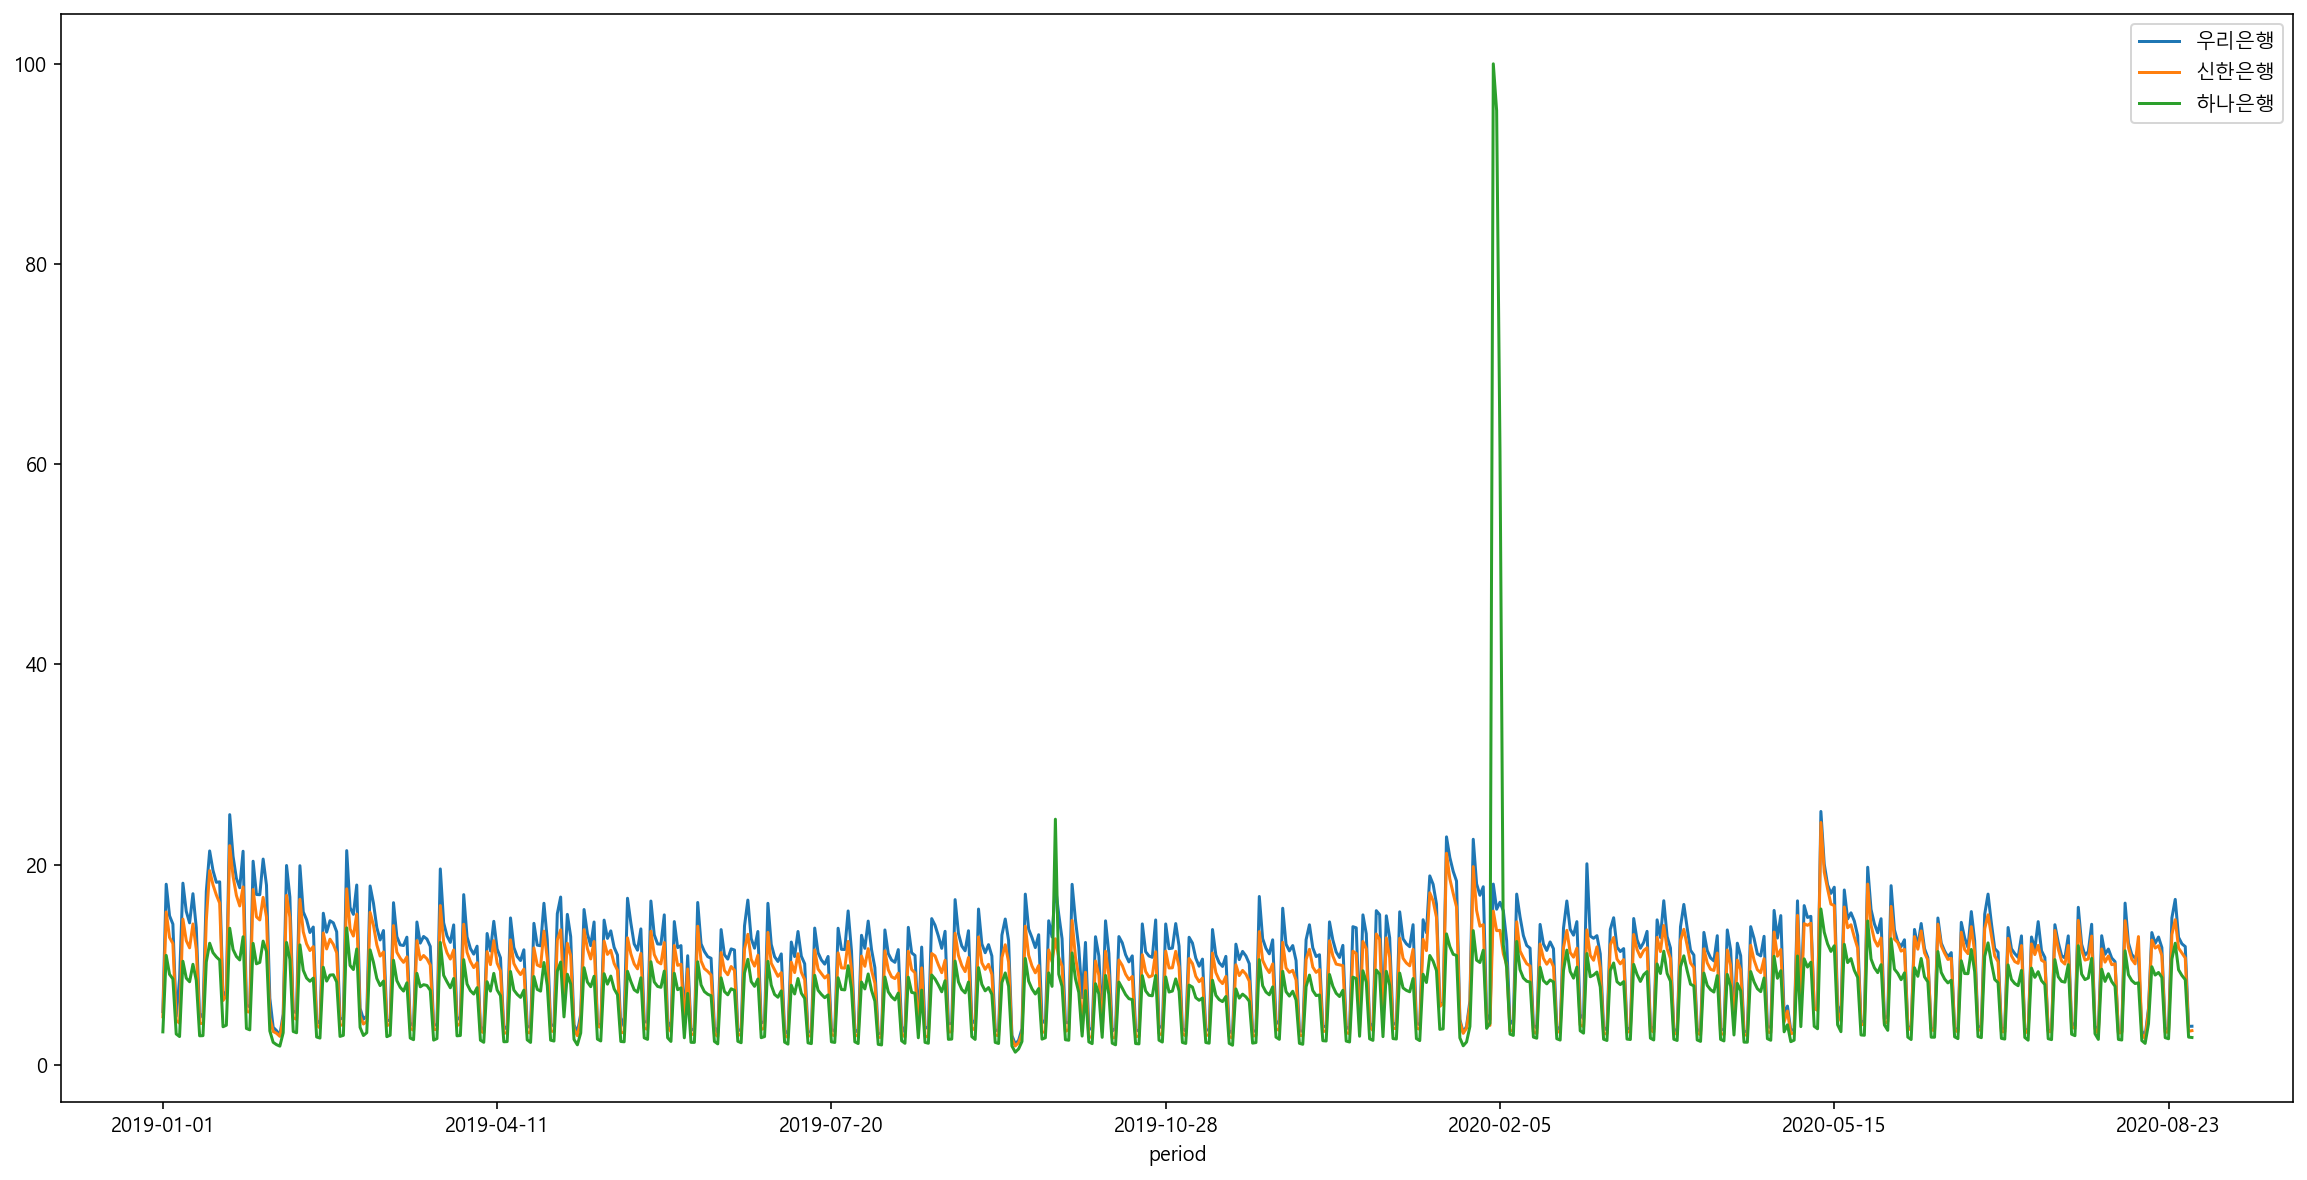

In [11]:
keywords=[
['우리은행'],
['신한은행'],
['하나은행'],
]
#네이버 데이터랩 서치
def MyDataLab(keywords=[],sday='2019-01-01',eday='2020-08-30',tunit='date'):
    res= Mynsearch(keywords,sday,eday,tunit)
    jdata=json.loads(res)
    # print(len(jdata['results']))
    i=0

    #테이블 머지를 위한 기초테이블
    maindf= pd.DataFrame()

    #키워드 별로 컬럼명 지정
    for words in keywords:
        pdata=jdata['results'][i]['data']
        i+=1
        df= pd.DataFrame.from_dict(pdata)
        df.columns=["period",words[0]]
        df1= df.set_index("period")
        maindf=pd.merge(maindf,df1,how="outer", left_index=True, right_index=True)
    return maindf

mdf= MyDataLab(keywords,'2019-01-01','2020-08-30','date')
print(mdf.head())
mdf.plot()
plt.show()